In [63]:
# Step 1: Import necessary libraries
import pandas as pd  # Used to load the dataset
import numpy as np  # Used to perform mathematical operations
import matplotlib.pyplot as plt  # Used to visualize the data
import seaborn as sns  # Used to visualize the data
from sklearn.preprocessing import LabelEncoder, Normalizer  # Used for encoding categorical data and normalizing
from sklearn.model_selection import train_test_split  # Used for splitting dataset
from sklearn.linear_model import LogisticRegression  # Model 1
from sklearn.tree import DecisionTreeClassifier  # Model 2
from sklearn.ensemble import RandomForestClassifier  # Model 3
from sklearn.metrics import confusion_matrix, roc_curve, auc  # Evaluation metrics
from sklearn.impute import SimpleImputer



In [64]:
# Step 2: Load the dataset
try:
    df = pd.read_csv("Dentistry Dataset.csv")  # Replace with your actual dataset file path
except FileNotFoundError:
    print("Error: Dentistry Dataset.csv not found. Please make sure the file is in the correct directory.")
    exit()



In [65]:
# Step 3: Display first few rows of the dataset
print("First 5 rows of the dataset:")
df.head()



First 5 rows of the dataset:


,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [66]:
# Step 4: Data Preprocessing
# Encoding categorical data
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Encoding target variable

# Identify numeric columns, excluding 'Sample ID'
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Sample ID' in numeric_cols:
    numeric_cols.remove('Sample ID')

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values in numeric columns with the median
if len(numeric_cols) > 0:
    numeric_imputer = SimpleImputer(strategy='median')
    df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Impute missing values in categorical columns with the most frequent value
if len(categorical_cols) > 0:
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Check for any remaining NaN values after imputation
print("\nNumber of NaN values per column after imputation:")
print(df.isnull().sum())

# Splitting independent and dependent variables
X = df.drop(columns=['Gender', 'Sample ID'])  # Exclude 'Sample ID' from features
Y = df['Gender']

# Convert X to a NumPy array
X = X.to_numpy()

# Normalizing the X variables
normalizer = Normalizer()
X = normalizer.fit_transform(X)

# Ensure no NaNs remain
print(f"\nAre there NaNs in X after normalization? {np.isnan(X).any()}")
if np.isnan(X).sum() == 0:
    print("Normalization successful!")
else:
    print("Error: X still contains NaN values after processing!")




Number of NaN values per column after imputation:
Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64

Are there NaNs in X after normalization? False
Normalization successful!


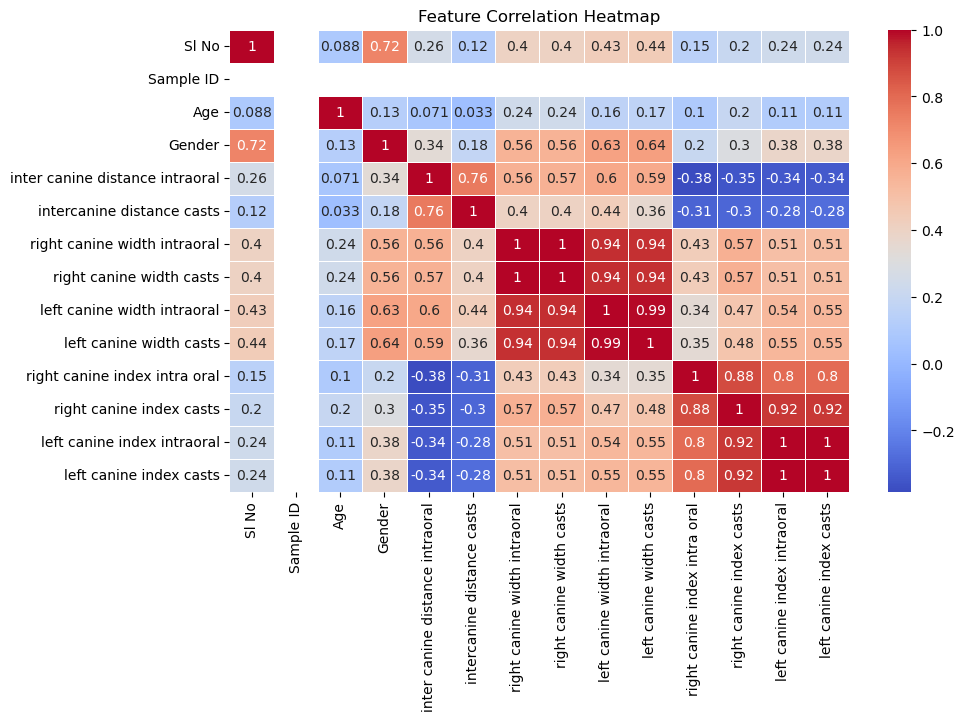

In [67]:
# Step 5: Exploratory Data Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



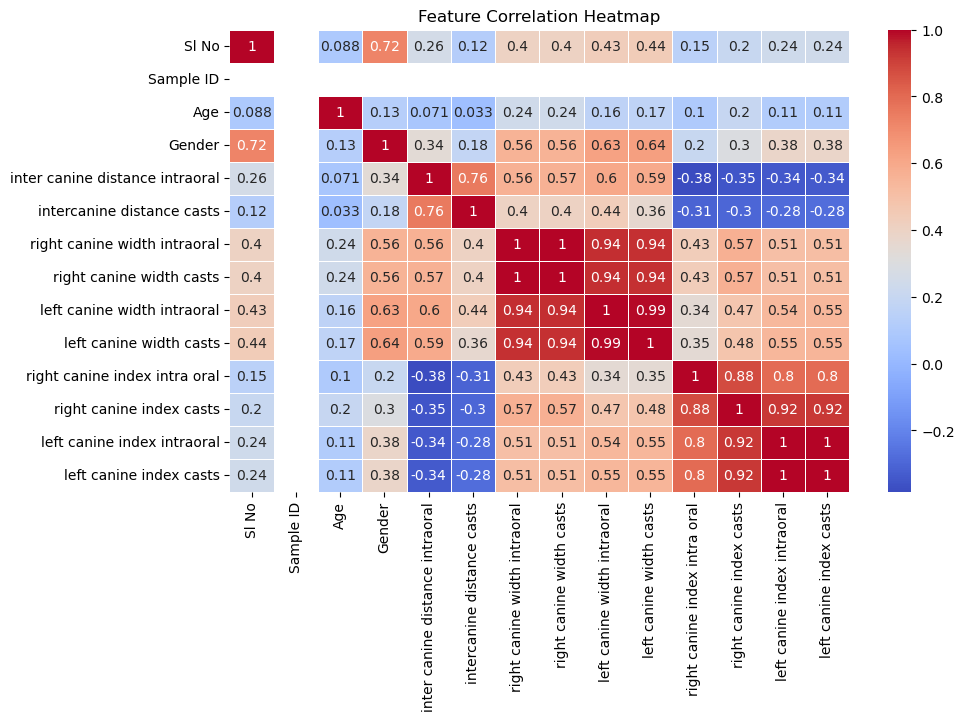

In [68]:
# Step 5: Visualizing the dataset
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Step 6: Save the cleaned dataset
df.to_csv("Dentistry_cleaned.csv", index=False)  # Save the cleaned dataset


In [69]:
# Step 6: Model Building
# Splitting the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Defining models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Training and evaluating models
print("\nModel Training and Evaluation:")
for name, model in models.items():
    model.fit(X_train, Y_train)
    accuracy = model.score(X_test, Y_test)
    print(f"{name} Accuracy: {accuracy:.4f}")




Model Training and Evaluation:
Logistic Regression Accuracy: 0.6591
Decision Tree Accuracy: 0.9864
Random Forest Accuracy: 0.9864



Model Evaluation - Confusion Matrices and ROC Curve:

Confusion Matrix for Logistic Regression:
[[53 60]
 [15 92]]

Confusion Matrix for Decision Tree:
[[112   1]
 [  2 105]]

Confusion Matrix for Random Forest:
[[111   2]
 [  1 106]]


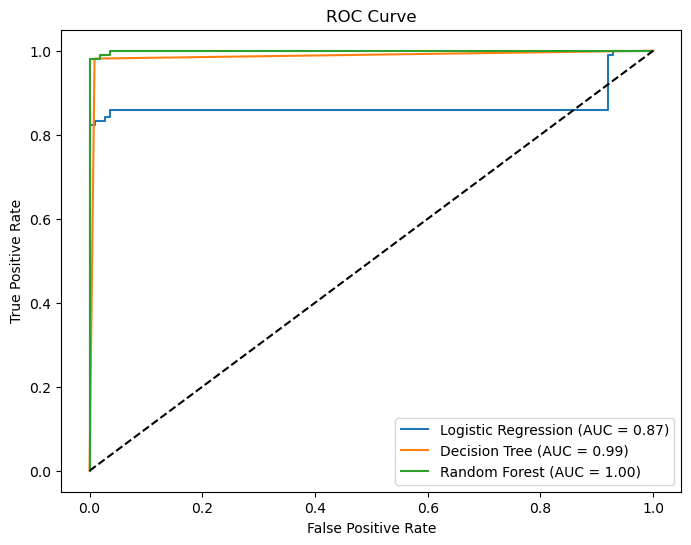

In [70]:
# Step 7: Model Evaluation
print("\nModel Evaluation - Confusion Matrices and ROC Curve:")
plt.figure(figsize=(8, 6))
for name, model in models.items():
    Y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred)
    print(f"\nConfusion Matrix for {name}:\n{cm}")

    # Probability prediction for ROC curve
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    else:
        print(f"Warning: {name} does not have predict_proba method, skipping ROC curve.")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



In [71]:
# Step 8: Save the cleaned dataset
df.to_csv("Dentistry_cleaned.csv", index=False)  # Save the cleaned dataset
print("\nCleaned dataset saved as Dentistry_cleaned.csv")


Cleaned dataset saved as Dentistry_cleaned.csv
